In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.layers import Input, Dense  # type: ignore
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
# Load Data
train_data = pd.read_csv('KDDTrain+.txt')
test_data = pd.read_csv('KDDTest+.txt')

In [5]:
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate' , 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate', 'attack', 'level']

In [6]:
train_data.columns = columns
test_data.columns = columns

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [9]:
train_data.isnull().sum().sum()

0

In [10]:
train_data.drop(['level'], axis = 1, inplace = True)
test_data.drop(['level'], axis = 1, inplace = True)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [11]:
numerical_features = [x for x in train_data.columns if train_data[x].dtype != 'O']
categorical_features = [x for x in train_data.columns if train_data[x].dtype == 'O'][:-1]

In [12]:
train_data['service'].nunique()

70

In [13]:
train_data[categorical_features].nunique()

protocol_type     3
service          70
flag             11
dtype: int64

In [14]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


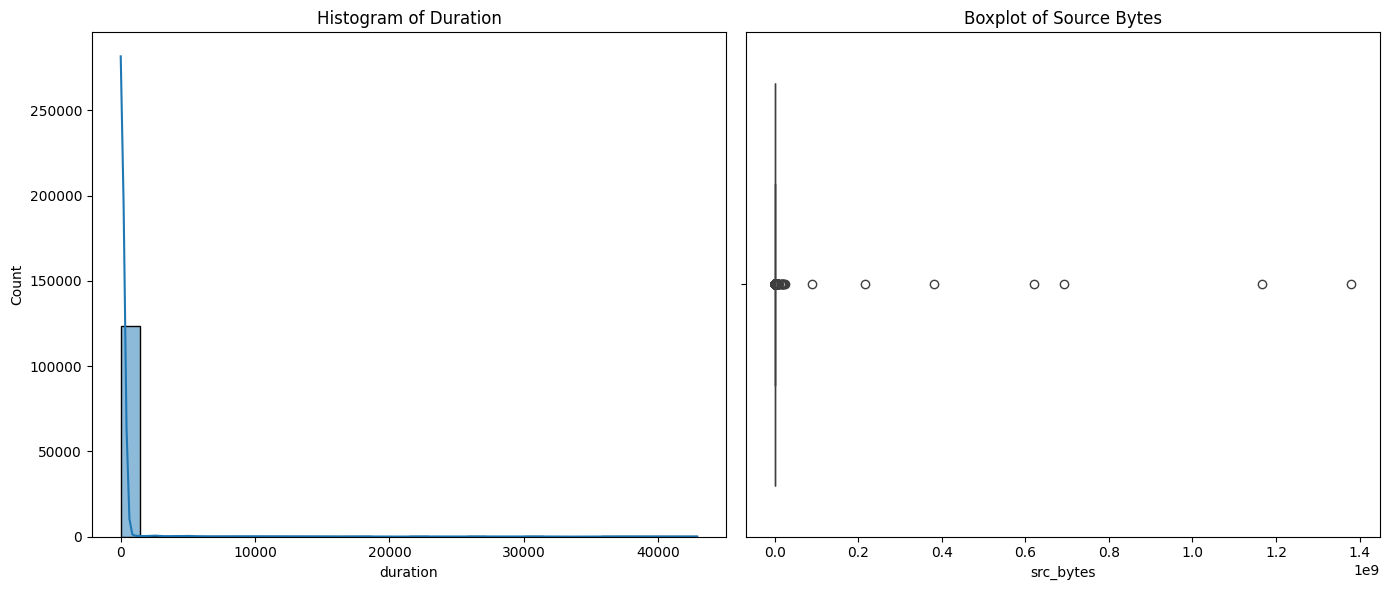

In [21]:
# Univariate Analysis
plt.figure(figsize=(14, 6))

# Histogram of "duration"
plt.subplot(1, 2, 1)
sns.histplot(train_data['duration'], kde=True, bins=30)
plt.title('Histogram of Duration')

# Boxplot of "src_bytes"
plt.subplot(1, 2, 2)
sns.boxplot(x=train_data['src_bytes'])
plt.title('Boxplot of Source Bytes')

plt.tight_layout()
plt.show()

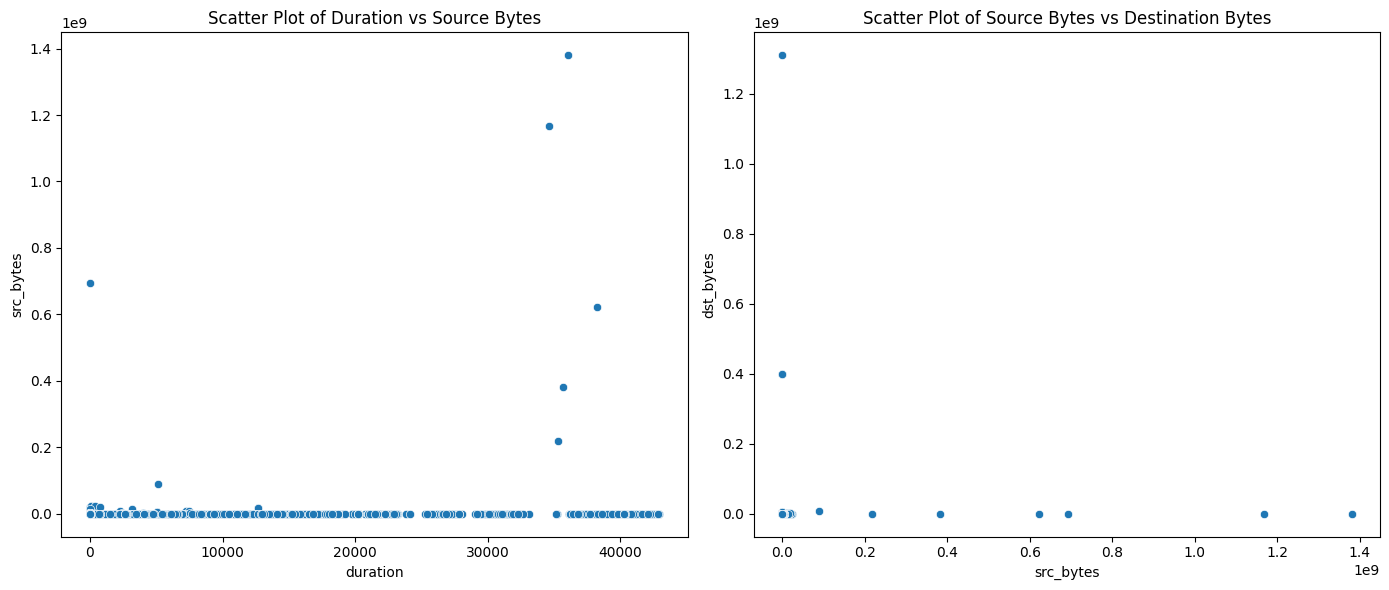

In [22]:
# Bivariate Analysis
plt.figure(figsize=(14, 6))

# Scatter plot of "duration" vs "src_bytes"
plt.subplot(1, 2, 1)
sns.scatterplot(x=train_data['duration'], y=train_data['src_bytes'])
plt.title('Scatter Plot of Duration vs Source Bytes')

# Scatter plot of "src_bytes" vs "dst_bytes"
plt.subplot(1, 2, 2)
sns.scatterplot(x=train_data['src_bytes'], y=train_data['dst_bytes'])
plt.title('Scatter Plot of Source Bytes vs Destination Bytes')

plt.tight_layout()
plt.show()

### Multivariate Analysis

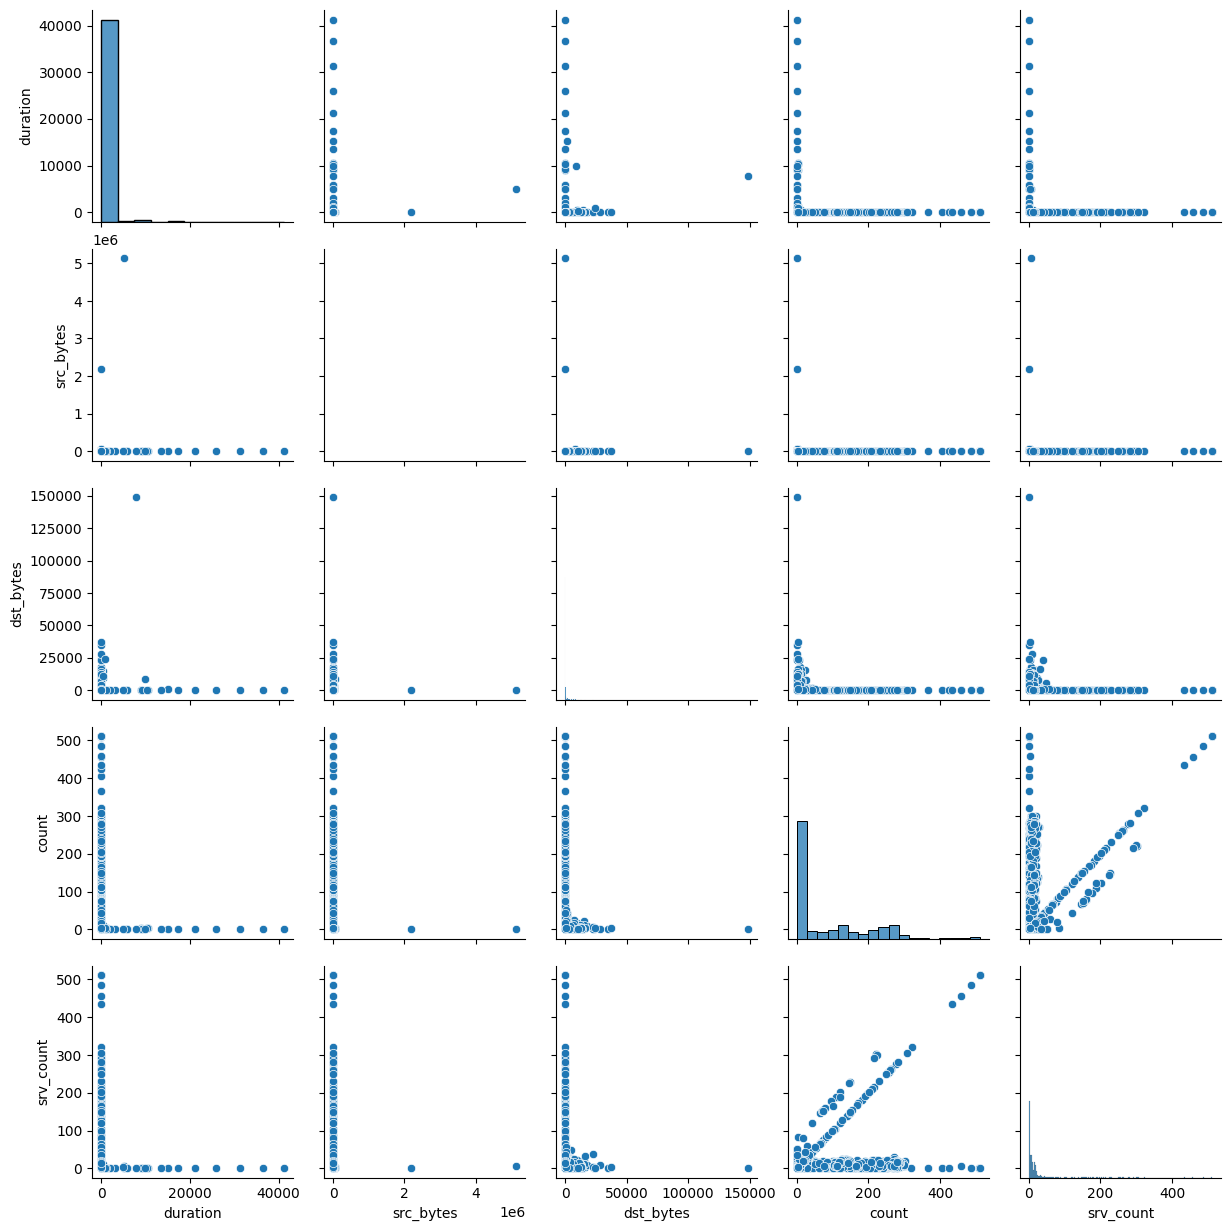

In [25]:
# Pair plot for selected features
selected_features = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count']
sns.pairplot(train_data.loc[:1000,selected_features])
plt.show()

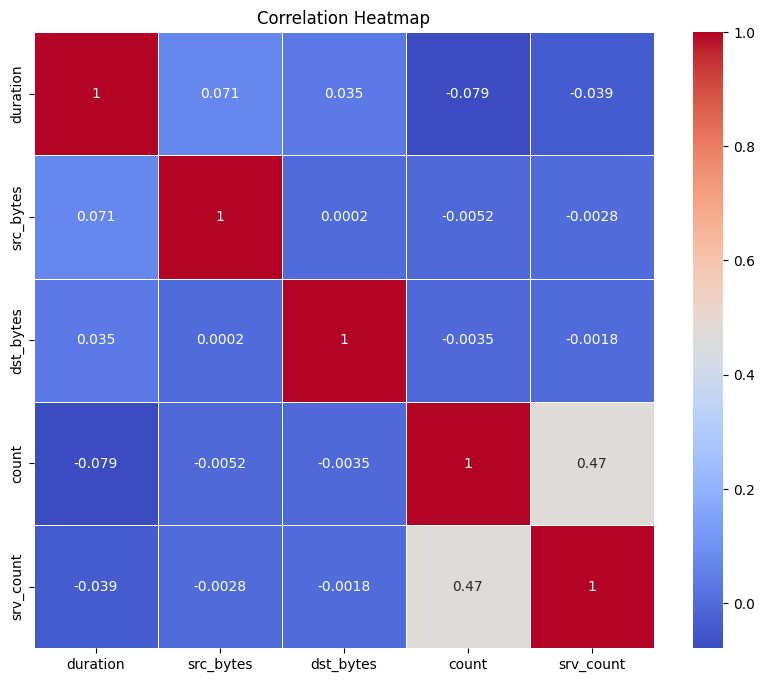

In [28]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = train_data[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [15]:
# One-Hot Encoding
encoder = OneHotEncoder()
encoded_train_data = encoder.fit_transform(train_data[categorical_features]).toarray()
encoded_test_data = encoder.transform(test_data[categorical_features]).toarray()

In [18]:
# Combine encoded features with original dataset
train_data = train_data.drop(categorical_features, axis=1)
test_data = test_data.drop(categorical_features, axis=1)

In [19]:
encoded_train_df = pd.DataFrame(encoded_train_data, columns=encoder.get_feature_names_out(categorical_features))
encoded_test_df = pd.DataFrame(encoded_test_data, columns=encoder.get_feature_names_out(categorical_features))

In [22]:
train_df = pd.concat([train_data, encoded_train_df], axis=1)
test_df = pd.concat([test_data, encoded_test_df], axis=1)

In [23]:
train_df = train_df[train_df['attack'] == 'normal']

In [24]:
train_df.drop(['attack'], axis = 1, inplace = True)

In [25]:
# Remove Outliers (2-sigma)
mean = np.mean(train_df, axis=0)
std_dev = np.std(train_df, axis=0)
train_data = train_df[(np.abs(train_df - mean) < 2 * std_dev).all(axis=1)]

In [53]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,67342.0,168.589899,1304.461651,0.0,0.0,0.0,0.0,40504.0
src_bytes,67342.0,13133.467064,418116.235843,0.0,129.0,233.0,324.0,89581520.0
dst_bytes,67342.0,4329.749517,65463.301630,0.0,105.0,379.0,2056.0,7028652.0
land,67342.0,0.000104,0.010195,0.0,0.0,0.0,0.0,1.0
wrong_fragment,67342.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
flag_S1,67342.0,0.005361,0.073021,0.0,0.0,0.0,0.0,1.0
flag_S2,67342.0,0.001767,0.042000,0.0,0.0,0.0,0.0,1.0
flag_S3,67342.0,0.000668,0.025842,0.0,0.0,0.0,0.0,1.0
flag_SF,67342.0,0.941344,0.234981,0.0,1.0,1.0,1.0,1.0


In [26]:
# Normalize Data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_df)

In [30]:
cols = [x for x in test_df.columns if x != 'attack']

In [31]:
test_data = scaler.transform(test_df[cols])

In [32]:
test_df['attack'] = (test_df['attack'] == 'normal').astype(int)

In [33]:
# Define Autoencoder
input_dim = train_data.shape[1]
input_layer = Input(shape=(input_dim,))
en = Dense(32, activation='relu')(input_layer)
en = Dense(5, activation='relu')(en)
de = Dense(32, activation='relu')(en)
output_layer = Dense(input_dim, activation='sigmoid')(de)
arch5layer = Model(inputs=input_layer, outputs=output_layer)
arch5layer.compile(optimizer='adam', loss='mae')

In [34]:
# Define Autoencoder
input_dim = train_data.shape[1]
input_layer = Input(shape=(input_dim,))
en = Dense(64, activation='relu')(input_layer)
en = Dense(32, activation='relu')(en)
en = Dense(5, activation='relu')(en)
de = Dense(32, activation='relu')(en)
de = Dense(64, activation='relu')(de)
output_layer = Dense(input_dim, activation='sigmoid')(de)
arch7layer = Model(inputs=input_layer, outputs=output_layer)
arch7layer.compile(optimizer='adam', loss='mae')

In [35]:
# Define Autoencoder
input_dim = train_data.shape[1]
input_layer = Input(shape=(input_dim,))
en = Dense(64, activation='relu')(input_layer)
en = Dense(32, activation='relu')(en)
en = Dense(16, activation='relu')(en)
en = Dense(5, activation='relu')(en)
en = Dense(16, activation='relu')(en)
de = Dense(32, activation='relu')(en)
de = Dense(64, activation='relu')(de)
output_layer = Dense(input_dim, activation='sigmoid')(de)
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mae')


In [36]:
arch5layer.fit(train_data, train_data, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

Epoch 1/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0905 - val_loss: 0.0173
Epoch 2/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0160 - val_loss: 0.0137
Epoch 3/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0137 - val_loss: 0.0133
Epoch 4/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0131 - val_loss: 0.0118
Epoch 5/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0118 - val_loss: 0.0117
Epoch 6/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 7/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0110 - val_loss: 0.0103
Epoch 8/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 9/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0101 - val_loss: 0.0100
Epoch 10/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 11/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 12/50
1684/1684 ━━━━━━━━

In [37]:
arch7layer.fit(train_data, train_data, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

Epoch 1/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0735 - val_loss: 0.0158
Epoch 2/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0158 - val_loss: 0.0152
Epoch 3/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0152 - val_loss: 0.0149
Epoch 4/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0149 - val_loss: 0.0131
Epoch 5/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0130 - val_loss: 0.0126
Epoch 6/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0125 - val_loss: 0.0124
Epoch 7/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0125 - val_loss: 0.0123
Epoch 8/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 9/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 10/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0124 - val_loss: 0.0122
Epoch 11/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0123 - val_loss: 0.0116
Epoch 12/50
1684/1684 ━━━━━━━━

In [38]:
# Train Autoencoder
autoencoder.fit(train_data, train_data, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

Epoch 1/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0785 - val_loss: 0.0180
Epoch 2/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0181 - val_loss: 0.0175
Epoch 3/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0173 - val_loss: 0.0160
Epoch 4/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0155 - val_loss: 0.0147
Epoch 5/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0146 - val_loss: 0.0138
Epoch 6/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0140 - val_loss: 0.0136
Epoch 7/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0138 - val_loss: 0.0136
Epoch 8/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0136 - val_loss: 0.0135
Epoch 9/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0137 - val_loss: 0.0134
Epoch 10/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0135 - val_loss: 0.0134
Epoch 11/50
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0136 - val_loss: 0.0134
Epoch 12/50
1684/1684 ━━━━━━━━

In [39]:
# Calculate Reconstruction Error on Training Data
reconstructions = autoencoder.predict(train_data)
train_loss_ae = np.mean(np.abs(reconstructions - train_data), axis=1)

2105/2105 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step


In [40]:
reconstructions = autoencoder.predict(train_data)
train_loss_5 = np.mean(np.abs(reconstructions - train_data), axis=1)

2105/2105 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [41]:
reconstructions = autoencoder.predict(train_data)
train_loss_7 = np.mean(np.abs(reconstructions - train_data), axis=1)

2105/2105 ━━━━━━━━━━━━━━━━━━━━ 2s 791us/step


In [42]:
print(train_loss_ae)

[0.01888418 0.00381546 0.00014628 ... 0.00893776 0.01461324 0.0003001 ]


In [43]:
y_true = test_df.attack

In [44]:
y_true = [0 if i else 1 for i in y_true]

In [45]:
np.unique(y_true)

array([0, 1])

In [46]:
def anomaly_detection(model, X_test, threshold):
    # Reconstruct test samples
    X_test_pred = model.predict(X_test)
    
    # Calculate reconstruction error (using MAE)
    reconstruction_errors = np.mean(np.abs(X_test - X_test_pred), axis=1)
    
    # Classify as anomaly if error > threshold
    predictions = (reconstruction_errors > threshold).astype(int)
    
    return predictions, reconstruction_errors


In [47]:
def evaluate_model(y_true, y_pred, reconstruction_errors):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, reconstruction_errors)
    roc_auc = auc(fpr, tpr)
    
    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


In [48]:
threshold = np.mean(train_loss_ae)

# Perform anomaly detection
y_pred, reconstruction_errors = anomaly_detection(autoencoder, test_data, threshold)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [52]:
test_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12983,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,20,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,15,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,267,14515,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,794,333,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22539,0,317,938,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22540,0,54540,8314,0,0,0,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22541,0,42,42,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
testing = test_df.drop(['attack'], axis=1)

In [54]:
print(testing.columns)

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=122)


In [55]:
scaled_testing = scaler.transform(testing)

In [56]:
testing_pred, re = anomaly_detection(autoencoder, scaled_testing, threshold)

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step


In [57]:
testing_pred

array([1, 1, 1, ..., 0, 0, 1])

In [58]:
threshold_5 = np.mean(train_loss_5)

# Perform anomaly detection
y_pred_5, reconstruction_errors_5 = anomaly_detection(arch5layer, test_data, threshold_5)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [59]:
threshold_7 = np.mean(train_loss_5)

# Perform anomaly detection
y_pred_7, reconstruction_errors_7 = anomaly_detection(arch5layer, test_data, threshold_7)


705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step


AutoEncoder with 9 Layers
Accuracy: 0.8789
Precision: 0.8402
Recall: 0.9723
F1-score: 0.9014
AUC: 0.9461


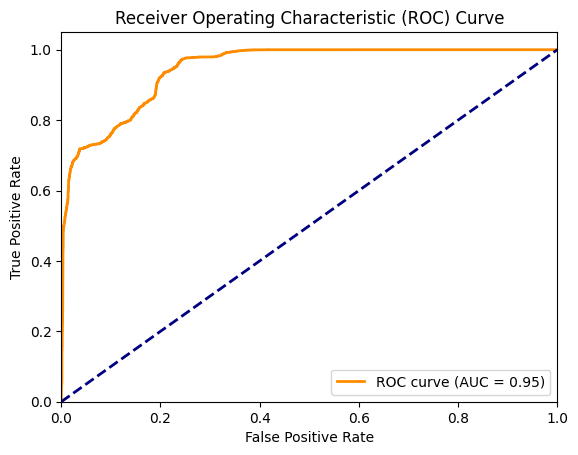

In [60]:
# Evaluate the model
print('AutoEncoder with 9 Layers')
evaluate_model(y_true, y_pred, reconstruction_errors)

AutoEncoder with 5 Layers
Accuracy: 0.8561
Precision: 0.8407
Recall: 0.9218
F1-score: 0.8794
AUC: 0.9468


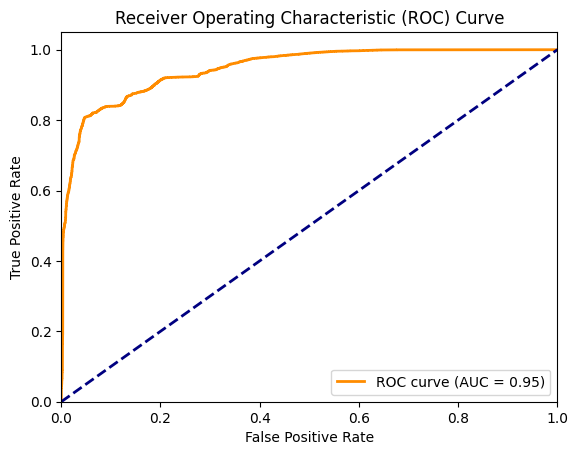

In [61]:
# Evaluate the model
print('AutoEncoder with 5 Layers')
evaluate_model(y_true, y_pred_5, reconstruction_errors_5)

AutoEncoder with 7 Layers
Accuracy: 0.8561
Precision: 0.8407
Recall: 0.9218
F1-score: 0.8794
AUC: 0.9468


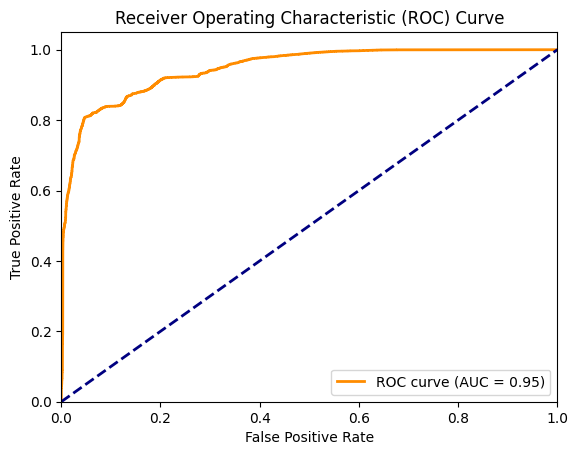

In [62]:
# Evaluate the model
print('AutoEncoder with 7 Layers')
evaluate_model(y_true, y_pred_7, reconstruction_errors_7)

In [63]:
y_pred = autoencoder.predict(test_df.drop(['attack'], axis = 1))

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
pickle.dump(encoder, open('encoder.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [64]:
autoencoder.save("model.keras")

In [65]:
np.mean(train_loss_ae)

0.008604401694782398

In [66]:
pd.set_option('display.max_columns', None)

In [67]:
test_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [68]:
import joblib
encoder = joblib.load('encoder.pkl')
scaler = joblib.load('scaler.pkl')

In [69]:
data = [
    0.0,  'tcp',     'private', 'REJ', 
    0.0,  0.0,       0.0,       0.0, 
    0.0,  0.0,       0.0,       0.0, 
    0.0,  0.0,       0.0,       0.0, 
    0.0,  0.0,       0.0,       0.0, 0.0,
    0.0,  136.0,     1.0,       0.0, 
    0.0,  1.0,       1.0,       0.01, 
    0.06, 0.0,       255.0,     1.0, 
    0.0,  0.06,      0.0,       0.0, 
    0.0,  0.0,       1.0,       1.0
]


In [102]:
threshold

0.03

In [71]:
categorical_features_indices = [1, 2, 3]
# Separate categorical and numerical features
categorical_features = []
numerical_features = []
for i in range(len(data)) :
    if i in categorical_features_indices :
        categorical_features.append(data[i])
    else :
        numerical_features.append(data[i])
# One-hot encode the categorical features
categorical_features_encoded = encoder.transform([categorical_features]).toarray()
# Concatenate encoded categorical and numerical features
processed_data = np.hstack((categorical_features_encoded, [numerical_features]))
# Normalize the data using MinMaxScaler
processed_data_scaled = scaler.transform(processed_data)

# Make prediction
prediction = autoencoder.predict(processed_data_scaled)
# Calculate reconstruction error (using MAE)
reconstruction_errors = np.mean(np.abs(processed_data_scaled - prediction), axis=1)

# Classify as anomaly if error > threshold
threshold = 0.007071806721629359
predictions = (reconstruction_errors > threshold).astype(int)
print(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1


d:\Anaconda\envs\nsl-kdd\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\nsl-kdd\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [176]:
train_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.00,0.00,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.20,0.20,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.00,0.00,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11,0,287,2251,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,7,0.00,0.00,0.0,0.0,1.00,0.00,0.43,8,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15,0,300,13788,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,9,0.00,0.11,0.0,0.0,1.00,0.00,0.22,91,255,1.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [91]:
processed_data_scaled = scaler.transform(test_df.drop(['attack'], axis = 1))

# Make prediction
prediction = autoencoder.predict(processed_data_scaled)

# Calculate reconstruction error (using MAE)
reconstruction_errors = np.mean(np.abs(processed_data_scaled - prediction), axis=1)

# Classify as anomaly if error > threshold
threshold = 0.030
predictions = (reconstruction_errors > threshold).astype(int)
print(predictions)

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step
[1 0 1 ... 0 0 1]


In [93]:
len(predictions)

22543

In [96]:
test_df['attack'] = predictions

In [100]:
test_df[test_df['attack'] == 0]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
1,2,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0,1022,387,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1.00,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0,129,174,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0,327,467,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,33,47,0.0,0.0,0.0,0.0,1.0,0.0,0.04,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [101]:
test_df[test_df['attack'] == 1]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,2,0.0,0.00,1.0,1.0,0.02,0.07,0.00,255,2,0.01,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,120,1.0,1.00,0.0,0.0,1.00,0.00,0.00,235,171,0.73,0.07,0.00,0.00,0.69,0.95,0.02,0.00,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1